In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [5]:
l = LogisticRegression()
l?

In [6]:
sgd = SGDClassifier()
sgd?

# L1 Penalty and Sparsity in Logistic Regression

Comparision of sparsity. i.e. percentage of zero coefficients.
for L1 and L2 Penalization for differeent value of C.

#### Import Statements


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


s = "\nDone(*_*)"
print(s)


Done(*_*)


#### Loading data

In [8]:
data = load_digits()

X,y = data.data,data.target

print(X.shape)
print(y)
print(s)

(1797, 64)
[0 1 2 ..., 8 9 8]

Done(*_*)


#### Transforming data

In [9]:
X = StandardScaler().fit_transform(X)
y_ = ( y > 4).astype(np.int)

#print(y_[800:])
print(s)



Done(*_*)


#### Fitting model

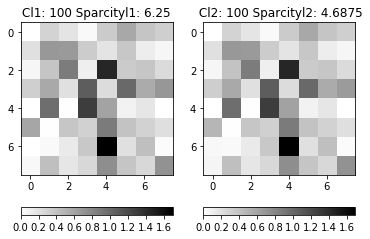

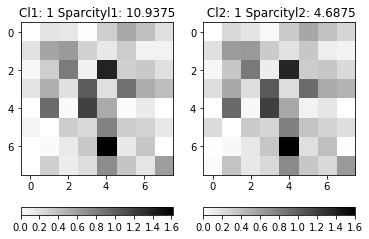

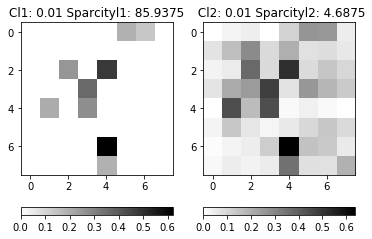

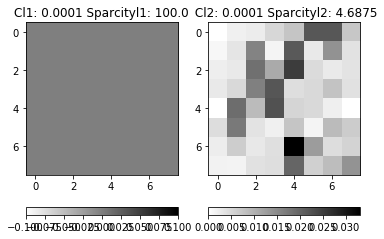

In [19]:
for i, C in enumerate((100,1,.01,.0001)):
    clf_l1 = LogisticRegression(C=C,penalty="l1")
    clf_l2 = LogisticRegression(C=C,penalty='l2')
    clf_l1 = clf_l1.fit(X,y_)
    clf_l2 = clf_l2.fit(X,y_)
    sparcity1 = np.mean(clf_l1.coef_.ravel() == 0)*100
    sparcity2 = np.mean(clf_l2.coef_.ravel() == 0)*100
    fig, ax = plt.subplots(2,2)
    plt.subplot(1,2,1)
    plt.imshow(np.abs(clf_l1.coef_.ravel().reshape(8,8)),interpolation="nearest",cmap="binary")
    plt.colorbar(orientation="horizontal")
    plt.title("Cl1: "+str(clf_l1.C)+" Sparcityl1: "+str(sparcity1))
    plt.subplot(1,2,2)
    plt.imshow(np.abs(clf_l2.coef_.ravel().reshape(8,8)),interpolation="nearest",cmap="binary")
    plt.colorbar(orientation="horizontal")
    plt.title(" Cl2: "+str(clf_l2.C)+" Sparcityl2: "+str(sparcity2))
    plt.show()

# Path with L1- Logistic Regression

Ploting the path of the coefficients of the model by varying the parameter "C"

#### Import Statements

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.svm import l1_min_c

s = "\nDone(*_*)"
print(s)


Done(*_*)


#### Loading data

In [72]:
data = load_iris()
X,y = data.data,data.target

## removing third class
X = X[y != 2]
y = y[y != 2]

#print(X[:10])
#print(np.mean(X[1]))
#print(np.mean(X,axis=0))
#print(X[0] == np.min(X[0]))
X = X - np.mean(X,axis=0)

#print(np.max(X,axis=0))
#print(X[:,0])
#print(X.shape,y.shape)
print(s)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[ 1.529  1.306  2.238  1.015]

Done(*_*)


Iris data has 4 features and in total 150 samples

In [73]:
## About data
print(X.shape)
print(np.unique(y))
print(data.feature_names)
print(data.target_names)

(100, 4)
[0 1]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


#### Model fitting

In [83]:
cs = l1_min_c(X,y,loss="log")*np.logspace(0,3)
print(cs)




"""
LR_model = LogisticRegression().fit(X,y)
print(LR_model.coef_)
"""
print(s)

[  0.01430615   0.01647204   0.01896583   0.02183717   0.02514321
   0.02894978   0.03333264   0.03837905   0.04418946   0.05087955
   0.05858248   0.06745159   0.07766345   0.08942134   0.10295932
   0.11854689   0.13649435   0.15715896   0.18095211   0.20834742
   0.23989026   0.27620854   0.31802525   0.36617281   0.42160969
   0.48543945   0.55893275   0.6435526    0.7409835    0.853165
   0.98233025   1.13105053   1.30228638   1.49944654   1.72645585
   1.98783333   2.28878215   2.63529323   3.0342645    3.49363819
   4.02255894   4.63155586   5.3327521    6.14010624   7.06969007
   8.14000863   9.37236848  10.79130195  12.42505542  14.30615165]

Done(*_*)


1.0


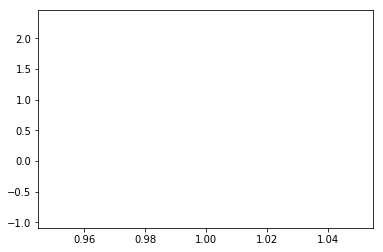

In [75]:
#print(LR_model.coef_[0].shape)
print(LR_model.C)
plt.plot([LR_model.C],LR_model.coef_,linewidth='100')
plt.show()

## Testing 

In [86]:
print(np.logspace(0,3).shape)

(50,)
